In [1]:
import pandas as pd

In [2]:
#Read the CSV file into a DataFrame
data = pd.read_csv(r'train.csv')

In [3]:
#Display first 5 rows of the Dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Display last 5 rows of the Dataframe
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking for duplicated rows
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Count the Number of People Survived.
pd.crosstab(data['Survived'],data['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [9]:
print(data['Sex'].value_counts())
print(data['Pclass'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [10]:
#Data Exploration

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Checking the Missing Values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

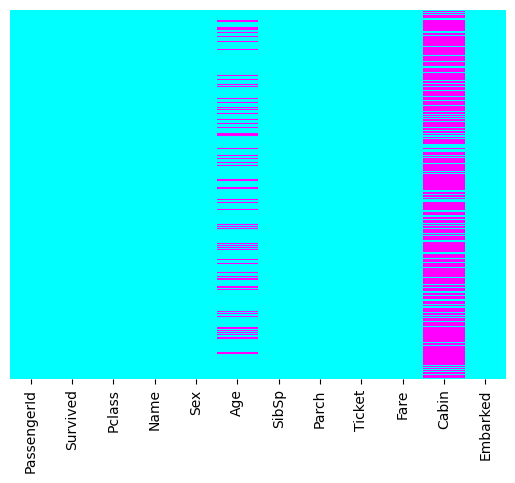

In [12]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='cool')

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Replace null values in the 'age' column with the mean age
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [15]:
# Replace null values in the 'cabin' column with a specific value (e.g., 'Unknown')
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [16]:
# Replace null values in the 'embarked' column with the most frequent value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().values[0])

In [17]:
#Convert data types
data['Age'] = data['Age'].astype(int)
data['Fare'] = data['Fare'].astype(float)

In [18]:
#Checking null values after data cleaning
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

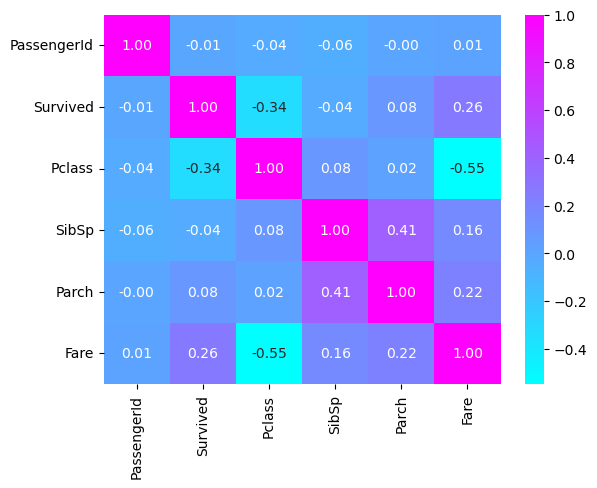

In [19]:
# Select only numeric columns (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_columns.corr()

sns.heatmap(corr, annot=True, cmap='cool', fmt=".2f")
plt.show()

<Axes: >

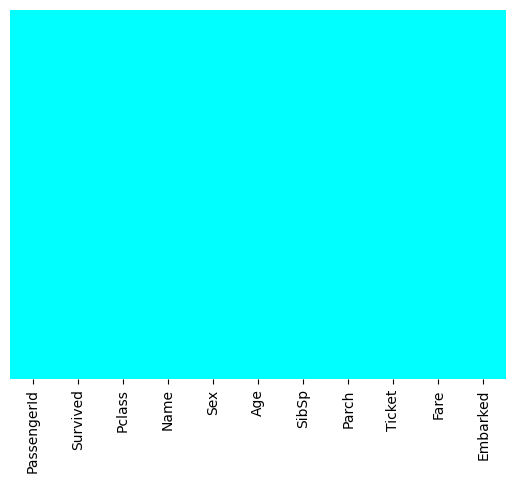

In [20]:
data.drop('Cabin',axis=1,inplace=True)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cool')

<Axes: xlabel='Pclass', ylabel='Age'>

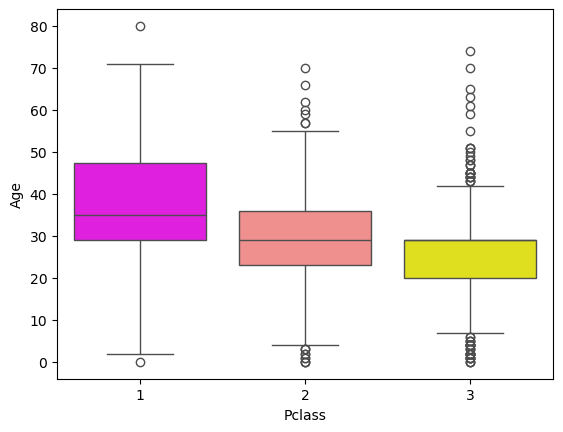

In [21]:
sns.boxplot(x='Pclass',y='Age',data=data, hue='Pclass', palette='spring', legend=False)

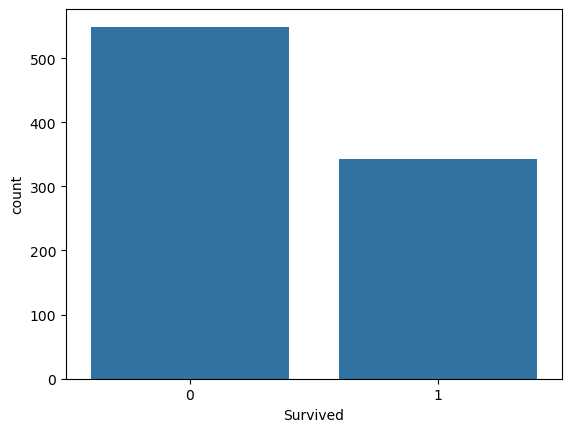

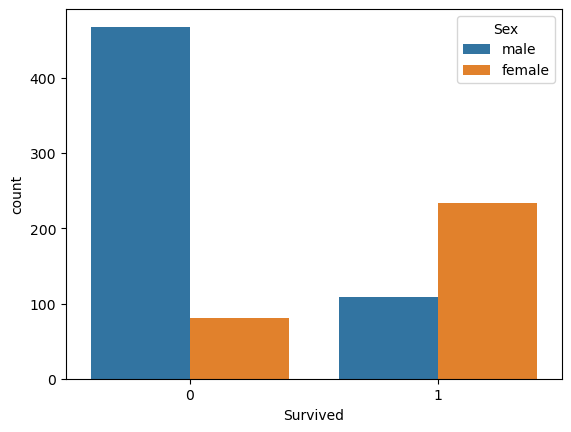

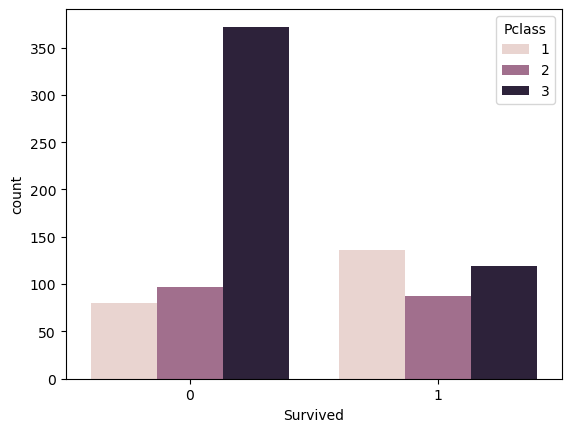

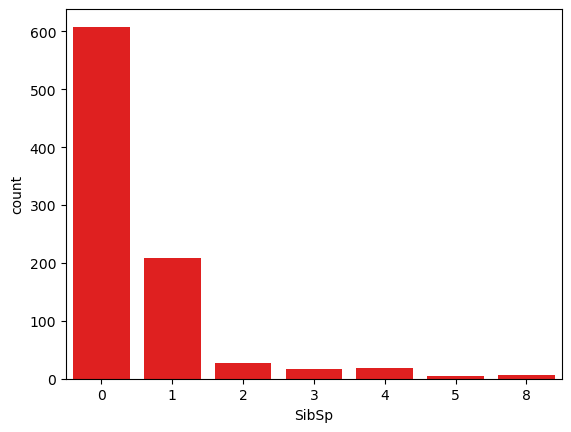

In [22]:
# Count plots
sns.countplot(x='Survived', data=data)
plt.show()

sns.countplot(x='Survived',hue='Sex',data=data)
plt.show()

sns.countplot(x='Survived',hue='Pclass', data=data)
plt.show()

sns.countplot(x='SibSp',data=data,color='red')
plt.show()

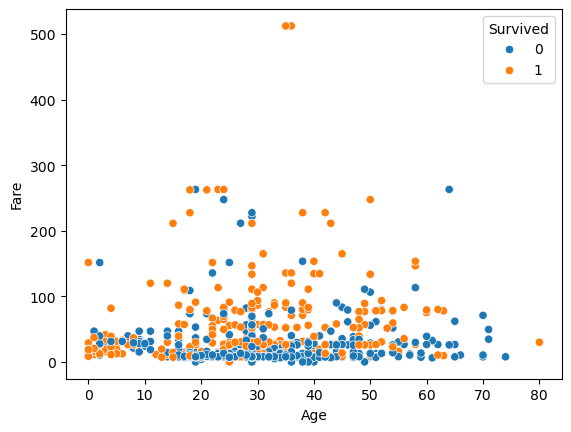

In [23]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.show()

In [24]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print(f"Total of women who survived: {rate_women}%")

Total of women who survived: 74.20382165605095%


In [25]:
men = data.loc[data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)*100

print(f"Total Percentage of men who survived: {rate_men}%")

Total Percentage of men who survived: 18.890814558058924%


In [26]:
#Data after EDA on a dataset
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C
